In [1]:
import pandas as pd
import numpy as np


1. To what extent do college sporting event outcomes correlate to reportable incidents?
1. Is Michigan State's campus more prone to incidents (correlated to the timing of sporting events) compared to Michigan?
1. What types of incidents are correlated to sport event outcomes?
1. Do games at certain times of the season have a correlation to frequency of incidents more than others?
1. "Do games at certain times" have a stronger correlation to incidents than other game times?



[Poll ranks and incidents](#polls)\
[Game classification](#big_game)\
[Analysis](#analysis)\
[Correlations](#corrs)


In [2]:
df = pd.read_csv('../04_finaldata/full_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_id           1714 non-null   int64  
 1   school            1714 non-null   object 
 2   sport             1714 non-null   object 
 3   start_dt          1714 non-null   object 
 4   season_type       1714 non-null   object 
 5   opponent          1714 non-null   object 
 6   result            1714 non-null   int64  
 7   team_points       1714 non-null   int64  
 8   opp_points        1714 non-null   int64  
 9   ot                1714 non-null   int64  
 10  rank              1340 non-null   object 
 11  opponent_rank     514 non-null    float64
 12  end_inc_window    1714 non-null   object 
 13  attendance        759 non-null    float64
 14  venue             749 non-null    object 
 15  excitement_index  622 non-null    float64
 16  incident_id       1172 non-null   float64


In [4]:
df.rename({'start_dt': 'start', 'season_type': 'type', 'team_points': 'school_points', 'result': 'school_result',
           'ot': 'overtime', 'rank': 'school_rank', 'end_inc_window': 'end_window', 'opp_points': 'opponent_points'}, 
          axis=1, 
          inplace=True
         )

In [5]:
df = df[['sport', 'school', 'opponent', 'game_id', 'start', 'incident_date', 'end_window', 'type', 'school_result', 
         'school_points', 'opponent_points', 'overtime', 'excitement_index', 'school_rank', 
         'opponent_rank', 'attendance', 'venue', 'incident_id', 'offense_id', 'offense_name']]

In [6]:
# place games in chronological order
df = df.sort_values('start')
df.head()

,sport,school,opponent,game_id,start,incident_date,end_window,type,school_result,school_points,opponent_points,overtime,excitement_index,school_rank,opponent_rank,attendance,venue,incident_id,offense_id,offense_name
318,football,michigan state,montana state,132,2009-09-05 12:00:00,2009-09-05 17:00:00,2009-09-05 23:00:00,regular,1,44,3,0,NaN,NaN,NaN,0.0,Spartan Stadium,51477851.0,55414365.0,All Other Larceny
1657,football,michigan,western michigan,0,2009-09-05 15:30:00,2009-09-05 16:00:00,2009-09-06 02:30:00,regular,1,31,7,0,NaN,NaN,NaN,0.0,Michigan Stadium,50954457.0,55757376.0,Pocket-picking
57,football,michigan state,central michigan,133,2009-09-12 12:00:00,2009-09-12 14:00:00,2009-09-12 23:00:00,regular,0,27,29,0,NaN,NaN,NaN,0.0,Spartan Stadium,51477882.0,55414369.0,Simple Assault
59,football,michigan state,central michigan,133,2009-09-12 12:00:00,2009-09-12 16:00:00,2009-09-12 23:00:00,regular,0,27,29,0,NaN,NaN,NaN,0.0,Spartan Stadium,51477883.0,55414370.0,Purse-snatching
60,football,michigan state,central michigan,133,2009-09-12 12:00:00,2009-09-12 21:00:00,2009-09-12 23:00:00,regular,0,27,29,0,NaN,NaN,NaN,0.0,Spartan Stadium,51477884.0,55411626.0,Theft From Building


In [7]:
df['school_rank'] = df['school_rank'].replace('-', np.nan)
df['opponent_rank'] = df['opponent_rank'].replace('-', np.nan)
df['school_rank'] = df['school_rank'].astype('float')
df['opponent_rank'] = df['opponent_rank'].astype('float')

In [8]:
# need hour column
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_hour'] = df['incident_date'].dt.hour

In [9]:
# need month column
df['incident_month'] = df['incident_date'].dt.month

In [10]:
# DataFrame w/ number of incidents per game as column
df['incident_count'] = df.groupby(['game_id'])['incident_id'].transform('count')

In [11]:
# score difference
df['score_diff'] = df['school_points'] - df['opponent_points']

In [12]:
df['school'] = df['school'].replace('michigan-state', 'michigan state')

In [13]:
df['offense_name'].value_counts()

Theft From Building                            237
Drug/Narcotic Violations                       203
Simple Assault                                 153
Destruction/Damage/Vandalism of Property       149
All Other Larceny                              137
Theft From Motor Vehicle                        63
Burglary/Breaking & Entering                    26
Aggravated Assault                              20
Intimidation                                    20
False Pretenses/Swindle/Confidence Game         16
Credit Card/Automated Teller Machine Fraud      15
Counterfeiting/Forgery                          13
Fondling                                        12
Motor Vehicle Theft                             10
Robbery                                         10
Rape                                             9
Shoplifting                                      9
Pocket-picking                                   9
Arson                                            8
Stolen Property Offenses       

In [14]:
offense_groups = {'Theft From Building': 'Theft', 
                  'Drug/Narcotic Violations': 'Substance Violation', 
                  'Simple Assault': 'Physical Altercation', 
                  'Destruction/Damage/Vandalism of Property': 'Property', 
                  'All Other Larceny': 'Theft',
                  'Theft From Motor Vehicle': 'Theft',
                  'Burglary/Breaking & Entering': 'Theft',
                  'Aggravated Assault': 'Physical Altercation',
                  'Intimidation': 'Physical',
                  'False Pretenses/Swindle/Confidence Game': 'Scam',
                  'Credit Card/Automated Teller Machine Fraud': 'Scam',
                  'Counterfeiting/Forgery': 'Scam',
                  'Fondling': 'Sexual',
                  'Motor Vehicle Theft': 'Theft',
                  'Robbery': 'Theft',
                  'Rape': 'Sexual',
                  'Shoplifting': 'Theft',
                  'Pocket-picking': 'Theft',
                  'Arson': 'Property',
                  'Stolen Property Offenses': 'Property',
                  'Theft of Motor Vehicle Parts of Accessories': 'Theft',
                  'Extortion/Blackmail': 'Scam',
                  'Theft From Coin-Operated Machine or Device': 'Theft',
                  'Sexual Assault With An Object': 'Sexual',
                  'Weapon Law Violations': 'Weapon Violation',
                  'Drug Equipment Violations': 'Substance Violations',
                  'Purse-snatching': 'Theft',
                  'Sodomy': 'Sexual',
                  'Embezzlement': 'Scam',
                  'Identity Theft': 'Scam',
                  'Impersonation': 'Scam',
                  'Animal Cruelty': 'Animal Cruelty',
                  'Wire Fraud': 'Scam',
                  'Kidnapping/Abduction': 'Physical Altercation'
                 }

df['offense_map'] = df['offense_name'].map(offense_groups) 

In [102]:
df['offense_map'].unique()

array(['Theft', 'Physical Altercation', 'Scam', 'Property',
       'Substance Violation', nan, 'Physical', 'Sexual',
       'Weapon Violation', 'Substance Violations', 'Animal Cruelty'],
      dtype=object)

In [94]:
one_hot = pd.get_dummies(df['offense_map'])

In [99]:
df = pd.concat([df, one_hot], axis=1)


<a id='polls'></a>



&nbsp;

## Exploring how poll rank affects incidents


In [15]:
df['top_25_matchup'] = np.where((df['school_rank'].notnull()) & (df['opponent_rank'].notnull()), 1, 0)
df['top_20_matchup'] = np.where((df['school_rank'] <=20) & (df['opponent_rank'] <= 20), 1, 0)
df['top_15_matchup'] = np.where((df['school_rank'] <=15) & (df['opponent_rank'] <= 15), 1, 0)
df['top_10_matchup'] = np.where((df['school_rank'] <=10) & (df['opponent_rank'] <= 10), 1, 0)
df['top_5_matchup'] = np.where((df['school_rank'] <=5) & (df['opponent_rank'] <= 5), 1, 0)

In [16]:
# df['top_25_matchup'] = np.where((df['rank'].notnull()) & (df['opponent_rank'].notnull()), 1, 0)
# df['top_20_matchup'] = np.where(((df['rank'] >15) & (df['rank'] <=20)) & ((df['opponent_rank'] > 15) & (df['opponent_rank'] <= 20)), 1, 0)
# df['top_15_matchup'] = np.where(((df['rank'] >10) & (df['rank'] <=15)) & ((df['opponent_rank'] > 10) & (df['opponent_rank'] <= 15)), 1, 0)
# df['top_10_matchup'] = np.where(((df['rank'] >5) & (df['rank'] <=10)) & ((df['opponent_rank'] > 5) & (df['opponent_rank'] <= 10)), 1, 0)
# df['top_5_matchup'] = np.where((df['rank'] <= 5) & (df['opponent_rank'] <= 5), 1, 0)

In [17]:
df[(df['top_10_matchup'] == 1) & (df['sport'] == 'football')][['school', 'opponent', 'school_rank', 'opponent_rank']][:15]

,school,opponent,school_rank,opponent_rank
1697,michigan,alabama,8.0,2.0
102,michigan state,ohio state,10.0,2.0
103,michigan state,ohio state,10.0,2.0
100,michigan state,ohio state,10.0,2.0
101,michigan state,ohio state,10.0,2.0
98,michigan state,ohio state,10.0,2.0
99,michigan state,ohio state,10.0,2.0
1243,michigan state,oregon,7.0,3.0
1244,michigan state,oregon,7.0,3.0
1245,michigan state,oregon,7.0,3.0



<a id='big_game'></a>



&nbsp;

## Game classification


In [18]:
# https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns

conditions = [
    df['top_5_matchup'].eq(1),
    df['top_10_matchup'].eq(1),
    df['top_15_matchup'].eq(1),
    df['top_20_matchup'].eq(1),
    df['top_25_matchup'].eq(1)
]

choices = [1, 2, 3, 4, 5]

df['poll_fifths'] = np.select(conditions, choices, default=np.nan)

In [19]:
conditions = [df['school'].eq('michigan') & df['opponent'].isin(['ohio state', 'notre dame', 'michigan state', 'michigan-state']), 
              df['school'].eq('michigan state') & df['opponent'].isin(['michigan'])]

choices = [1, 1]
df['rivalry'] = np.select(conditions, choices, default=0)

In [20]:
df['incident_hour'].isnull().value_counts()

False    1172
True      542
Name: incident_hour, dtype: int64

In [21]:
df[df['top_10_matchup'] == 1][:15]

,sport,school,opponent,game_id,start,incident_date,end_window,type,school_result,school_points,...,incident_count,score_diff,offense_map,top_25_matchup,top_20_matchup,top_15_matchup,top_10_matchup,top_5_matchup,poll_fifths,rivalry
531,basketball,michigan state,north carolina (10),634,2009-12-01 21:00:00,NaT,2009-12-02 07:00:00,regular,0,82,...,0,-7,NaN,1,1,1,1,0,2.0,0
1359,basketball,michigan state,texas (2),639,2009-12-22 19:00:00,NaT,2009-12-23 05:00:00,regular,0,68,...,0,-11,NaN,1,1,1,1,0,2.0,0
1588,basketball,michigan state,purdue (6),652,2010-02-09 21:00:00,NaT,2010-02-10 07:00:00,regular,0,64,...,0,-12,NaN,1,1,1,1,0,2.0,0
326,basketball,michigan state,duke (1),671,2010-12-01 21:30:00,NaT,2010-12-02 07:30:00,regular,0,79,...,0,-5,NaN,1,1,1,1,0,2.0,0
77,basketball,michigan state,syracuse (8),673,2010-12-07 21:00:00,NaT,2010-12-08 07:00:00,regular,0,58,...,0,-14,NaN,1,1,1,1,0,2.0,0
569,basketball,michigan state,ohio state (10),729,2012-03-04 16:00:00,NaT,2012-03-05 02:00:00,regular,0,70,...,0,-2,NaN,1,1,1,1,0,2.0,0
654,basketball,michigan,ohio state (7),366,2012-03-10 16:05:00,2012-03-11 01:00:00,2012-03-11 03:05:00,CTOURN,0,55,...,2,-22,Substance Violation,1,1,1,1,0,2.0,0
655,basketball,michigan,ohio state (7),366,2012-03-10 16:05:00,2012-03-10 22:00:00,2012-03-11 03:05:00,CTOURN,0,55,...,2,-22,Theft,1,1,1,1,0,2.0,0
546,basketball,michigan state,ohio state (7),732,2012-03-11 15:30:00,NaT,2012-03-12 01:30:00,CTOURN,1,68,...,0,4,NaN,1,1,1,1,0,2.0,0
1697,football,michigan,alabama,36,2012-09-01 20:00:00,2012-09-01 21:00:00,2012-09-02 07:00:00,regular,0,14,...,1,-27,Weapon Violation,1,1,1,1,0,2.0,0


<a id='analysis'></a>


&nbsp;

## Analysis


In [87]:
# what's the mean number of incidents generated from football rivlary games?
print(df[(df['rivalry'] == 1) & (df['sport'] == 'football')].groupby('game_id')['incident_id'].agg('count').mean())
# basketball?
print(df[(df['rivalry'] == 1) & (df['sport'] == 'basketball')].groupby('game_id')['incident_id'].agg('count').mean())

3.4390243902439024
0.5714285714285714


In [88]:
# count incidents after top 25 game vs. all incidents that occur after a game
print('{:.2f}'.format(len(df[df['top_25_matchup'] == 1]) / len(df)))
print('{:.2f}'.format(len(df[df['top_10_matchup'] == 1]) / len(df)))

0.17
0.04


In [104]:
# what is the number of games that are top 25 out of the whole?
df_nodups = df.drop_duplicates('game_id')

In [90]:
print(len(df_nodups[df_nodups['top_25_matchup'] == 1]), 
      'out of', 
      len(df_nodups), 
      'Michigan / Michigan State games (football or basketball) were top 25 matchups -', 
      '{:.2f}'.format(len(df_nodups[df_nodups['top_25_matchup'] == 1]) / len(df_nodups) * 100), 'percent')

print(len(df_nodups[df_nodups['top_10_matchup'] == 1]), 
      'out of', 
      len(df_nodups), 
      'Michigan / Michigan State games (football or basketball) were top 25 matchups -', 
      '{:.2f}'.format(len(df_nodups[df_nodups['top_10_matchup'] == 1]) / len(df_nodups) * 100), 'percent')

166 out of 993 Michigan / Michigan State games (football or basketball) were top 25 matchups - 16.72 percent
42 out of 993 Michigan / Michigan State games (football or basketball) were top 25 matchups - 4.23 percent


In [26]:
# what %age of incidents are associated w/ ranked games when Michigan or Michigan State lost?
# convert to for loop

df_cfbloss = df[(df['school_result'] == 0) & (df['sport'] == 'football')]
df_cfbwin = df[(df['school_result'] == 1) & (df['sport'] == 'football')]

print('{:.2f}'.format(len(df[(df['top_25_matchup'] == 1) & (df['school_result'] == 0)]) 
                      / len(df[df['school_result'] == 0])), 
      'top 25 where Michigan / MSU lost'
     )
print('{:.2f}'.format(len(df[(df['top_10_matchup'] == 1) & (df['school_result'] == 0)]) 
                      / len(df[df['school_result'] == 0])), 
      'top 10 where Michigan / MSU lost \n'
     )

# what about if it's just football?
print('{:.2f}'.format(len(df_cfbloss[df_cfbloss['top_25_matchup'] == 1]) / len(df_cfbloss)), 
      'top 25 CFB where Michigan / Michigan State lost')

print('{:.2f}'.format(len(df_cfbloss[df_cfbloss['top_10_matchup'] == 1]) / len(df_cfbloss)), 
      'top 25 CFB where Michigan / Michigan State lost \n')


# losing a football rivalry game?
print('{:.2f}'.format(len(df_cfbloss[(df_cfbloss['rivalry'] == 1)])
                      / len(df_cfbloss)), 'for Michigan / Michigan State rivalry games with a CFB loss \n---')



print('{:.2f}'.format(len(df[(df['top_25_matchup'] == 1) & (df['school_result'] == 1)]) 
                      / len(df[df['school_result'] == 1])), 
      'top 25 where Michigan / MSU won'
     )
print('{:.2f}'.format(len(df[(df['top_10_matchup'] == 1) & (df['school_result'] == 1)]) 
                      / len(df[df['school_result'] == 1])), 
      'top 10 where Michigan / MSU won \n'
     )

# what about if it's just football?
print('{:.2f}'.format(len(df_cfbwin[df_cfbwin['top_25_matchup'] == 1]) / len(df_cfbwin)), 
      'top 25 CFB where Michigan / Michigan State won')

print('{:.2f}'.format(len(df_cfbwin[df_cfbwin['top_10_matchup'] == 1]) / len(df_cfbwin)), 
      'top 25 CFB where Michigan / Michigan State won \n')


# winning a football rivalry game?
print('{:.2f}'.format(len(df_cfbwin[(df_cfbwin['rivalry'] == 1)])
                      / len(df_cfbwin)), 'for Michigan / Michigan State rivalry games with a CFB win')

0.29 top 25 where Michigan / MSU lost
0.07 top 10 where Michigan / MSU lost 

0.32 top 25 CFB where Michigan / Michigan State lost
0.06 top 25 CFB where Michigan / Michigan State lost 

0.35 for Michigan / Michigan State rivalry games with a CFB loss 
---
0.13 top 25 where Michigan / MSU won
0.03 top 10 where Michigan / MSU won 

0.15 top 25 CFB where Michigan / Michigan State won
0.04 top 25 CFB where Michigan / Michigan State won 

0.13 for Michigan / Michigan State rivalry games with a CFB win


In [27]:
# number of ranked football games Michigan + Michigan State lost
len(df_cfbloss[(df_cfbloss['top_25_matchup'] == 1)])

76


People tend to react less negatively when it's a rivalry game, and their team wins.\
The negative emotion associated with a loss seems to have a larger increase in reported incidents).


In [28]:
# what is the mean number of incidents for top 25 and top 10 matchups?
print(df[df['top_25_matchup'] == 1].groupby('game_id')['incident_id'].agg('count').mean())
print(df[df['top_10_matchup'] == 1].groupby('game_id')['incident_id'].agg('count').mean())

1.1927710843373494
1.1428571428571428


In [29]:
# convert to for loop
print(df[df['sport'] == 'football'].groupby('game_id')['incident_id'].agg('count').mean())
print(df[(df['top_25_matchup'] == 1) & (df['sport'] == 'football')].groupby('game_id')['incident_id'].agg('count').mean(), 'top 25')
print(df[(df['top_20_matchup'] == 1) & (df['sport'] == 'football')].groupby('game_id')['incident_id'].agg('count').mean(), 'top 20')
print(df[(df['top_15_matchup'] == 1) & (df['sport'] == 'football')].groupby('game_id')['incident_id'].agg('count').mean(), 'top 15')
print(df[(df['top_10_matchup'] == 1) & (df['sport'] == 'football')].groupby('game_id')['incident_id'].agg('count').mean(), 'top 10')
print(df[(df['top_5_matchup'] == 1) & (df['sport'] == 'football')].groupby('game_id')['incident_id'].agg('count').mean(), 'top 5')

2.6741573033707864
2.803921568627451 top 25
2.75 top 20
3.1904761904761907 top 15
3.0 top 10
3.0 top 5


In [30]:
# verify the output above
df_nodups[(df_nodups['top_25_matchup'] == 1) & (df_nodups['sport'] == 'football')]['incident_count'].mean()

2.803921568627451

In [31]:
# only two football games that were a top 5 matchup
df_nodups[(df_nodups['sport'] == 'football') & (df_nodups['top_5_matchup'] == 1)][['school', 'opponent', 'school_rank', 'opponent_rank']]

,school,opponent,school_rank,opponent_rank
412,michigan state,iowa,5.0,4.0
1196,michigan,ohio state,3.0,2.0



!!! The mean of incidents occurring when it's a top 10 matchup is actually *higher* for football - interesting


In [32]:
print(df[df['sport'] == 'basketball'].groupby('game_id')['incident_id'].agg('count').mean())
print(df[(df['top_25_matchup'] == 1) & (df['sport'] == 'basketball')].groupby('game_id')['incident_id'].agg('count').mean())
print(df[(df['top_10_matchup'] == 1) & (df['sport'] == 'basketball')].groupby('game_id')['incident_id'].agg('count').mean())
print(df[(df['rivalry'] == 1) & (df['sport'] == 'basketball')].groupby('game_id')['incident_id'].agg('count').mean())

0.6308539944903582
0.4782608695652174
0.4838709677419355
0.5714285714285714



Basketball shows the opposite effect: incidents tend to go down for bigger games.\
Possible confounding factors exist for basketball, like weather for the time of year and games played mid-week vs. Saturday.



<a id='corrs'></a>



&nbsp;

## Correlations


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df.columns[9]

'school_points'

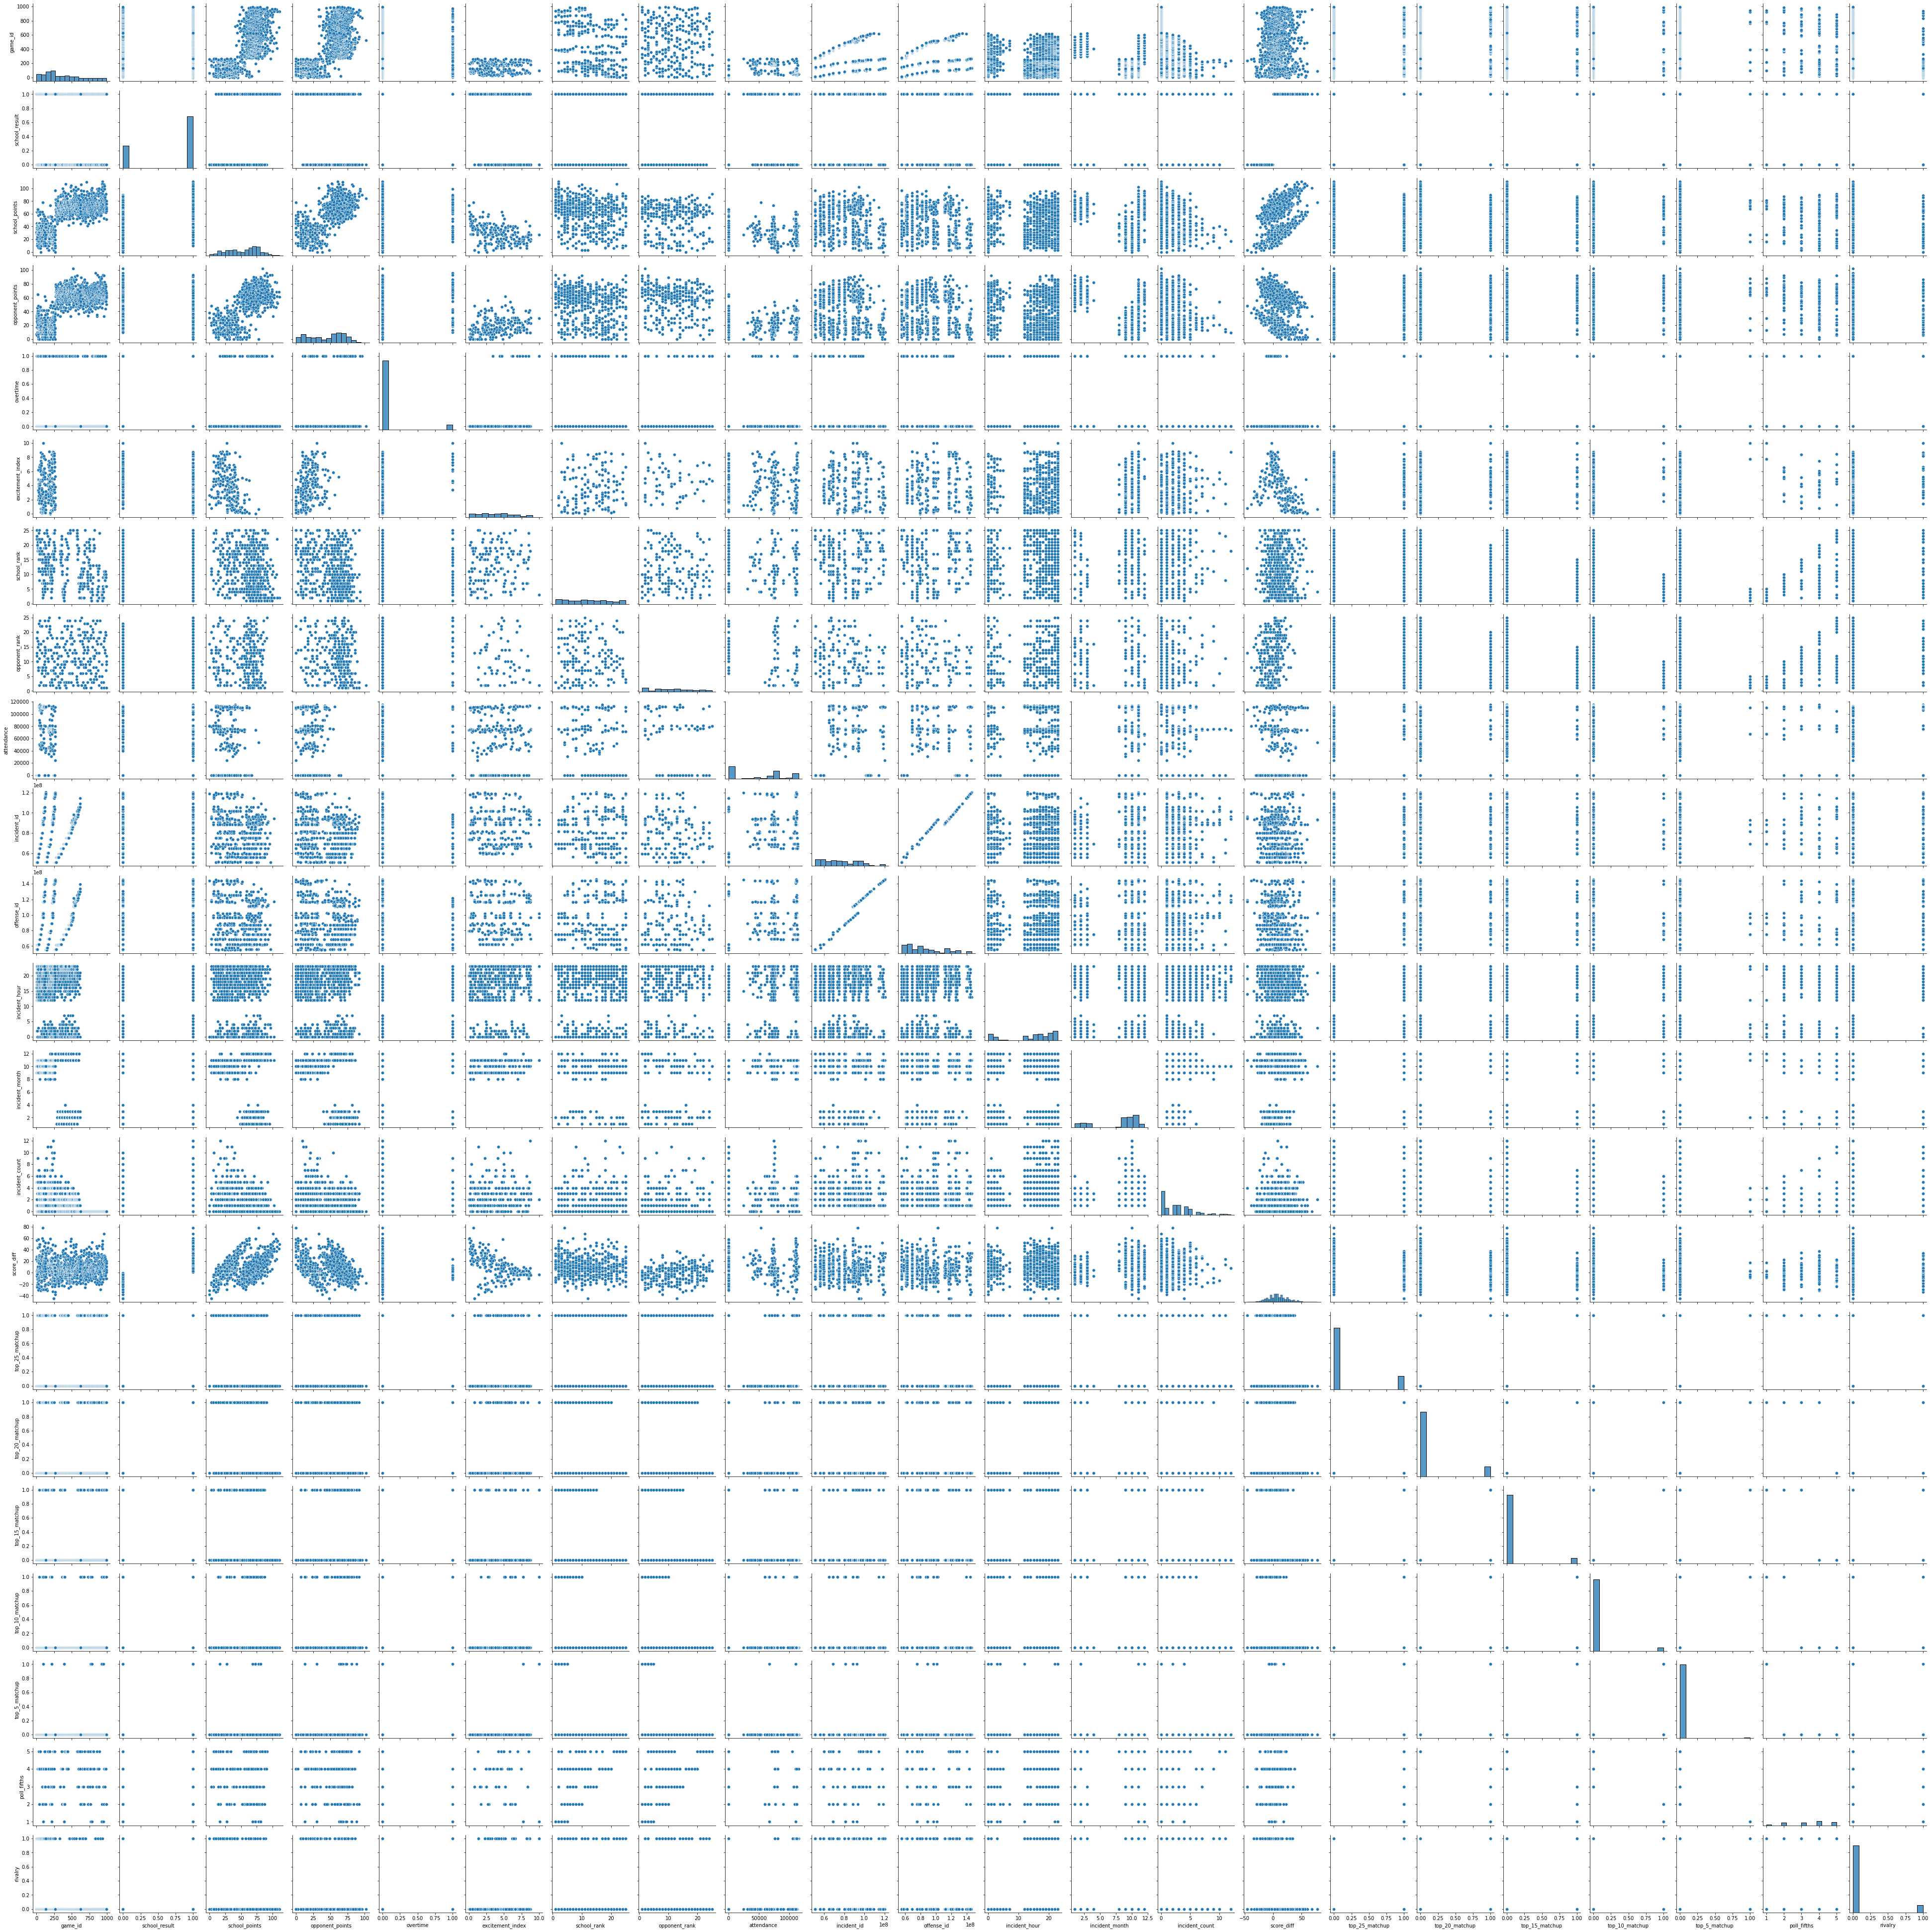

In [35]:
sns.pairplot(df)

In [36]:
df[df['sport'] == 'football']['incident_hour'].value_counts()

23.0    69
17.0    66
12.0    60
16.0    57
20.0    55
18.0    51
22.0    49
19.0    47
0.0     46
21.0    45
15.0    38
13.0    35
2.0     29
14.0    29
1.0     19
3.0      8
4.0      7
5.0      4
Name: incident_hour, dtype: int64

In [37]:
df[(df['rivalry'] == 1) & (df['sport'] == 'football')].head()

,sport,school,opponent,game_id,start,incident_date,end_window,type,school_result,school_points,...,incident_count,score_diff,offense_map,top_25_matchup,top_20_matchup,top_15_matchup,top_10_matchup,top_5_matchup,poll_fifths,rivalry
374,football,michigan,notre dame,1,2009-09-12 15:30:00,2009-09-12 17:00:00,2009-09-13 02:30:00,regular,1,38,...,5,4,Theft,0,0,0,0,0,NaN,1
372,football,michigan,notre dame,1,2009-09-12 15:30:00,2009-09-12 17:00:00,2009-09-13 02:30:00,regular,1,38,...,5,4,Theft,0,0,0,0,0,NaN,1
371,football,michigan,notre dame,1,2009-09-12 15:30:00,2009-09-12 16:00:00,2009-09-13 02:30:00,regular,1,38,...,5,4,Scam,0,0,0,0,0,NaN,1
370,football,michigan,notre dame,1,2009-09-12 15:30:00,2009-09-12 23:00:00,2009-09-13 02:30:00,regular,1,38,...,5,4,Property,0,0,0,0,0,NaN,1
373,football,michigan,notre dame,1,2009-09-12 15:30:00,2009-09-12 16:00:00,2009-09-13 02:30:00,regular,1,38,...,5,4,Physical Altercation,0,0,0,0,0,NaN,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poll_fifths', ylabel='incident_count'>

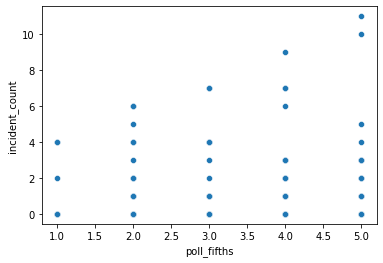

In [38]:
# scatterplot of high-incident games vs. hour
sns.scatterplot(df_nodups['poll_fifths'], df_nodups['incident_count'])

<AxesSubplot:xlabel='incident_hour', ylabel='Count'>

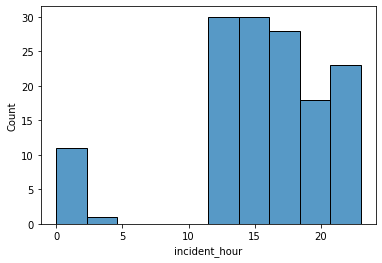

In [39]:
sns.histplot(df[(df['rivalry'] == 1) & (df['sport'] == 'football')]['incident_hour'])

In [40]:
df['score_quantile'] = pd.qcut(df['score_diff'], 4, labels=[1, 2, 3, 4])

In [41]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['score_quantile'] = enc.fit_transform(df['score_quantile'])
df['score_quantile'].unique()

array([3, 1, 0, 2], dtype=int64)

In [42]:
enc = LabelEncoder()
df['venue_enc'] = enc.fit_transform(df['venue'])
df['venue_enc'].unique()

array([17, 10, 11,  3,  9,  6, 19, 21, 15, 16,  2, 12,  5, 13,  1,  4,  8,
       14, 20,  7,  0, 18])

In [43]:
df[['score_diff', 'score_quantile']].sample(15)

,score_diff,score_quantile
1316,-10,0
402,15,2
341,2,1
753,-1,1
1053,38,3
985,-10,0
1126,4,1
1665,21,3
1329,3,1
1613,14,2


In [44]:
df['poll_diff'] = df['school_rank'] - df['opponent_rank']

In [45]:
groupby_gameid = df.groupby('game_id')

<AxesSubplot:>

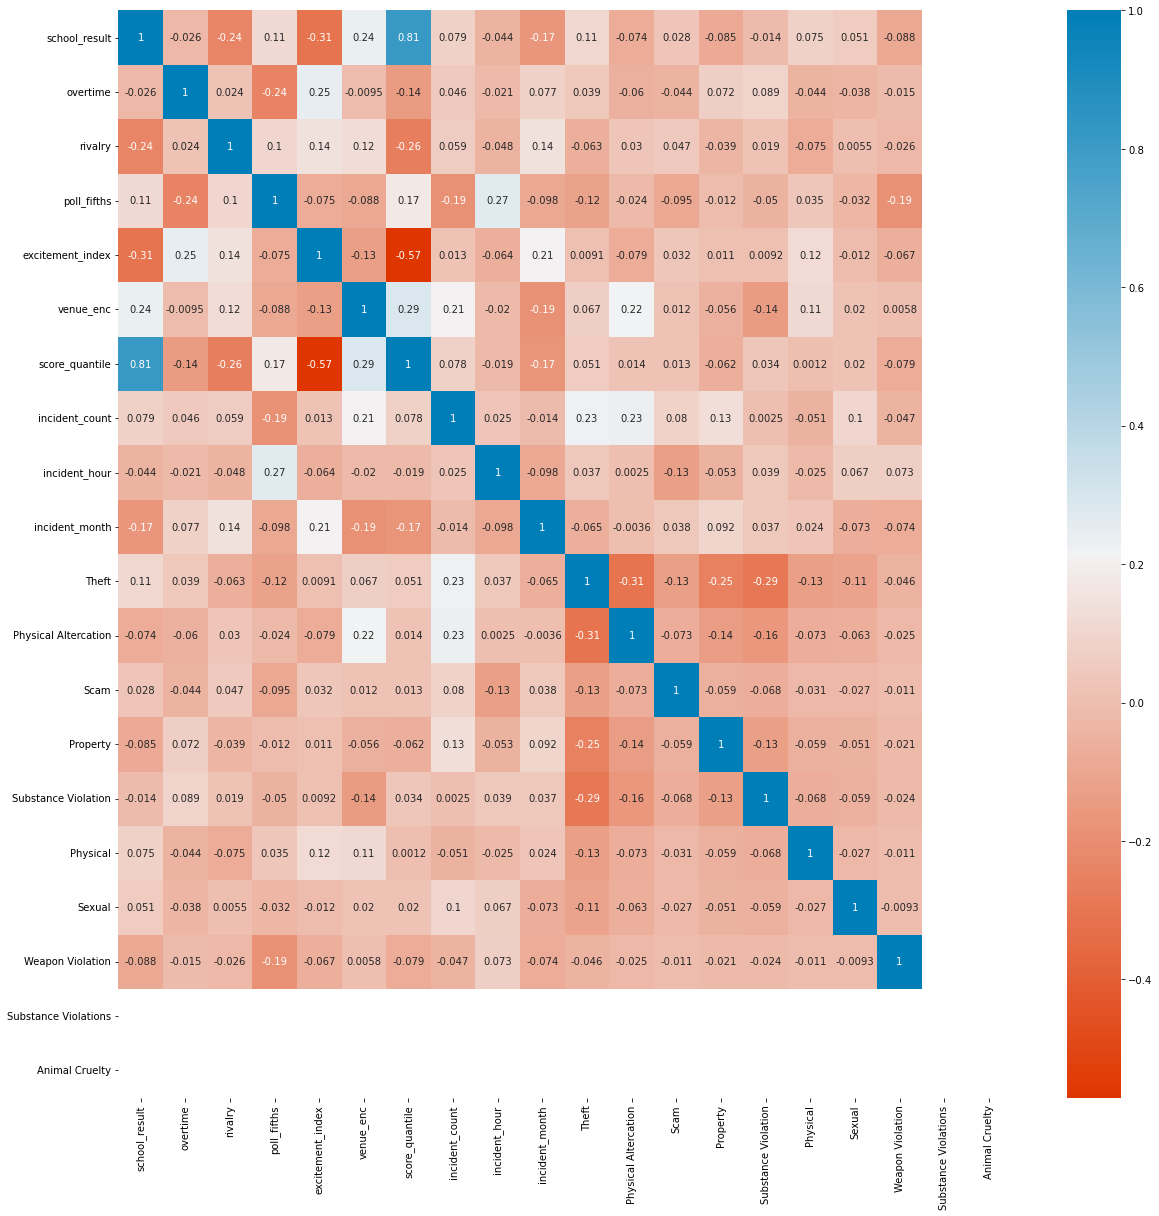

In [107]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap((df_nodups[df_nodups['sport'] == 'football']
             [['school_result', 'start', 'offense_name', 'overtime', 'rivalry', 'poll_fifths', 
               'excitement_index', 'venue_enc', 'score_quantile', 'incident_count', 'incident_hour', 'incident_month', 
               'Theft', 'Physical Altercation', 'Scam', 'Property', 'Substance Violation', 'Physical', 'Sexual',
               'Weapon Violation', 'Substance Violations', 'Animal Cruelty']])
            .corr(method='spearman'), 
            cmap=sns.diverging_palette(16, 240, s=100, l=50, as_cmap=True), 
            annot=True, 
            annot_kws={"fontsize":10}
           )

<AxesSubplot:>

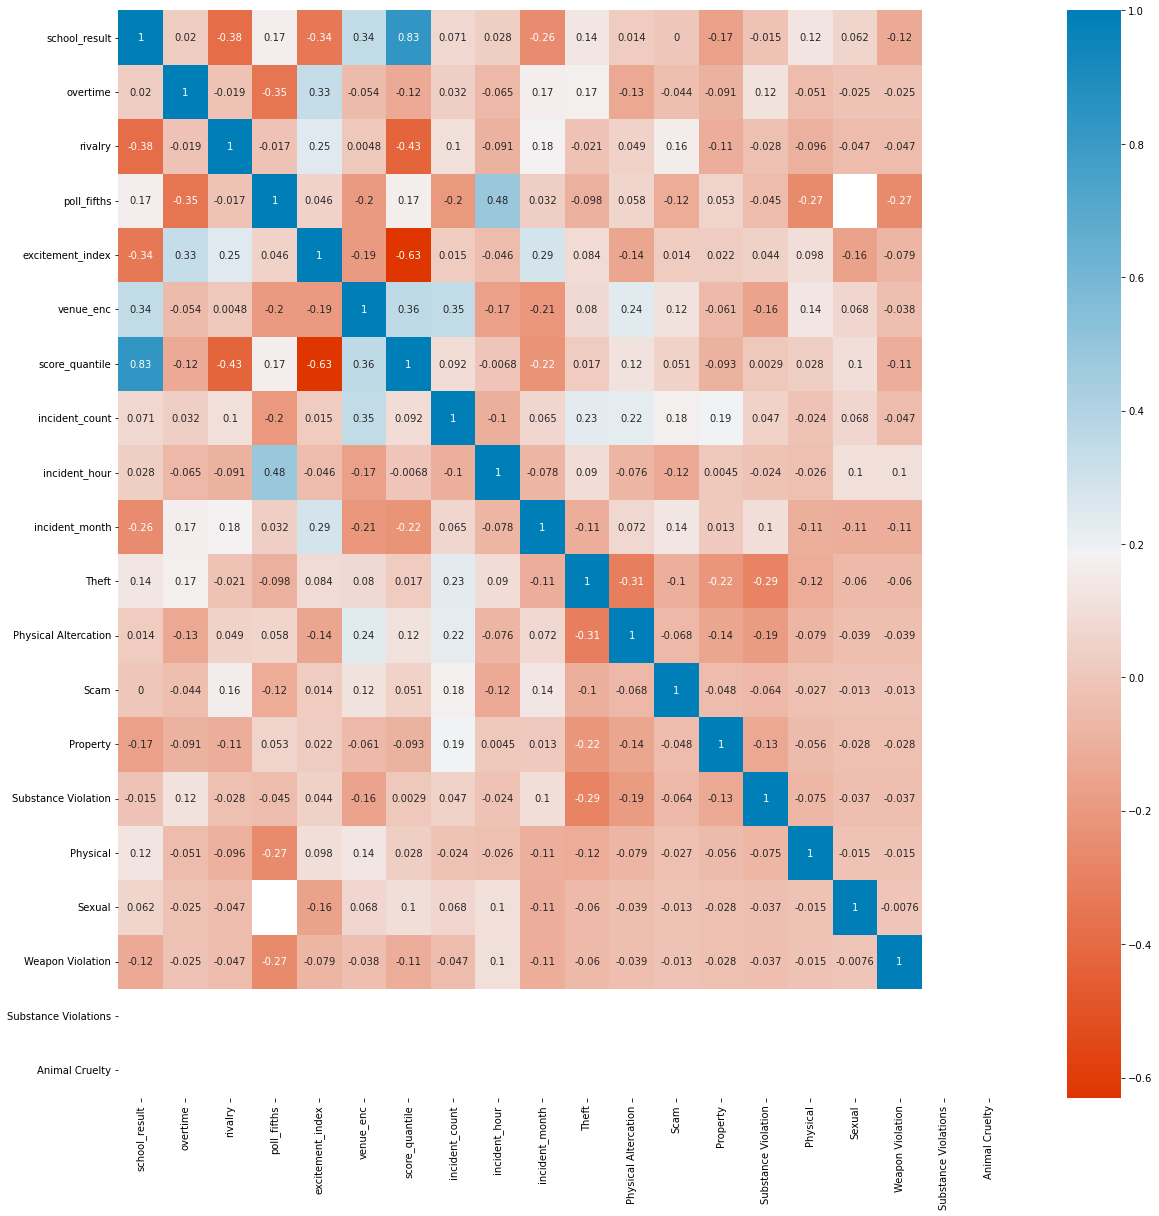

In [106]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(((df_nodups[(df_nodups['sport'] == 'football') & (df_nodups['school'] == 'michigan')])
             [['school_result', 'start', 'offense_name', 'overtime', 'rivalry', 'poll_fifths', 
               'excitement_index', 'venue_enc', 'score_quantile', 'incident_count', 'incident_hour', 'incident_month',
               'Theft', 'Physical Altercation', 'Scam', 'Property', 'Substance Violation', 'Physical', 'Sexual',
               'Weapon Violation', 'Substance Violations', 'Animal Cruelty']])
            .corr(method='spearman'), 
            cmap=sns.diverging_palette(16, 240, s=100, l=50, as_cmap=True), 
            annot=True, 
            annot_kws={"fontsize":10}
           )

<AxesSubplot:>

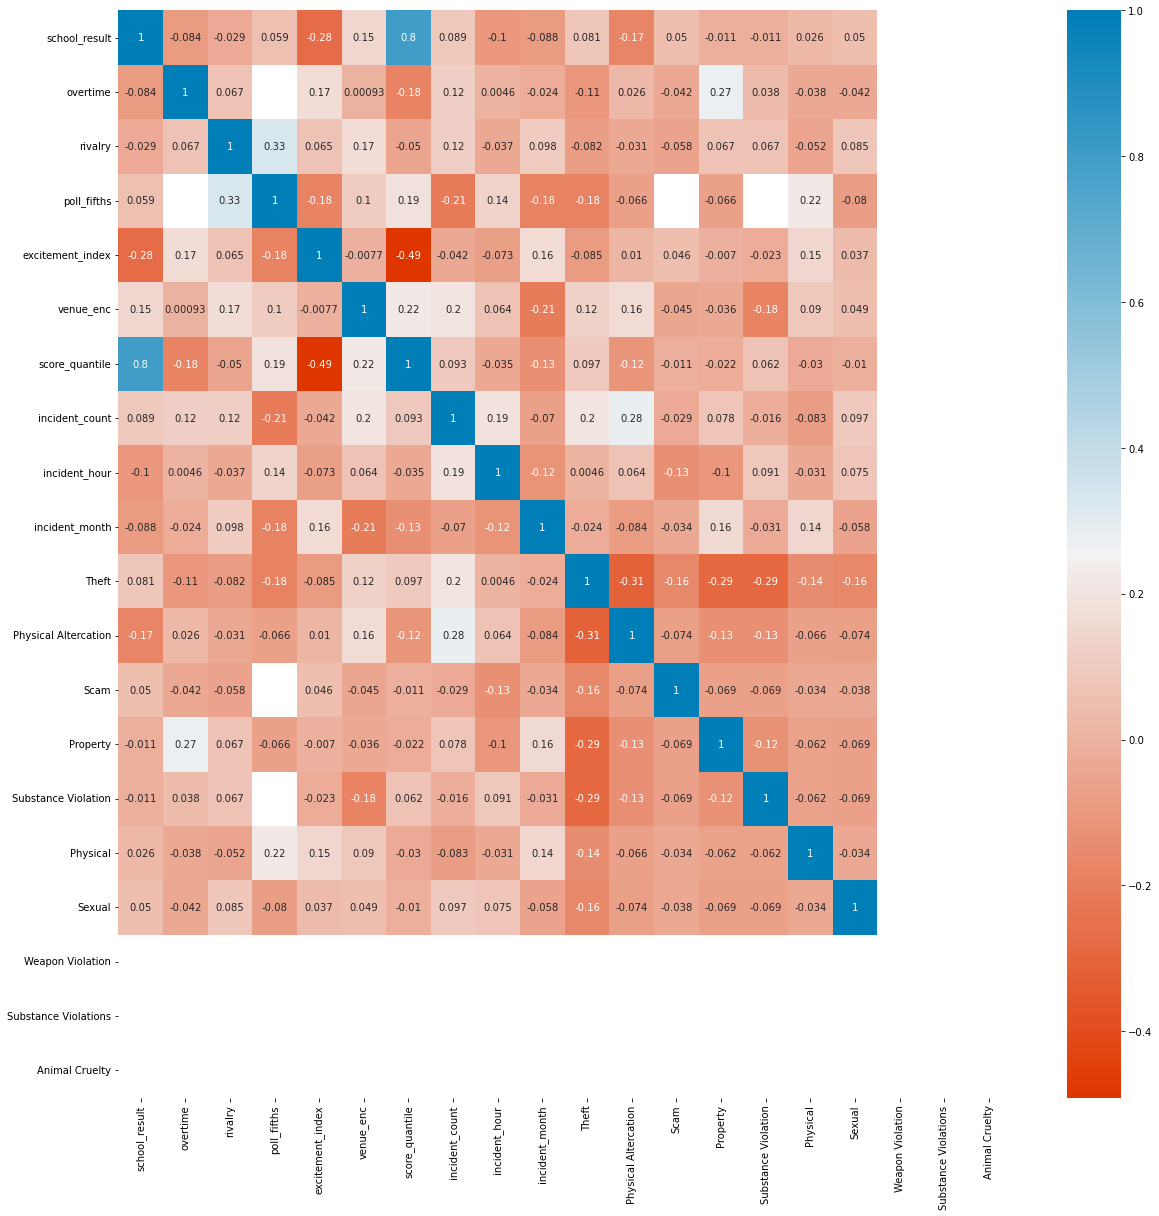

In [105]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(((df_nodups[(df_nodups['sport'] == 'football') & (df_nodups['school'] == 'michigan state')])
             [['school_result', 'start', 'offense_name', 'overtime', 'rivalry', 'poll_fifths', 
               'excitement_index', 'venue_enc', 'score_quantile', 'incident_count', 'incident_hour', 'incident_month', 
               'Theft', 'Physical Altercation', 'Scam', 'Property', 'Substance Violation', 'Physical', 'Sexual',
               'Weapon Violation', 'Substance Violations', 'Animal Cruelty']])
            .corr(method='spearman'), 
            cmap=sns.diverging_palette(16, 240, s=100, l=50, as_cmap=True), 
            annot=True, 
            annot_kws={"fontsize":10}
           )

In [84]:
df['venue_enc'].replace(17, 23, inplace=True)
df['venue_enc'].replace(10, 24, inplace=True)

In [85]:
df[['venue', 'venue_enc']]

,venue,venue_enc
318,Spartan Stadium,23
1657,Michigan Stadium,24
57,Spartan Stadium,24
59,Spartan Stadium,24
60,Spartan Stadium,24
...,...,...
921,Memorial Stadium,9
920,Memorial Stadium,9
919,Memorial Stadium,9
1556,Michigan Stadium,24


In [73]:
df['venue_enc'].unique()

array([17, 10, 11,  3,  9,  6, 19, 21, 15, 16,  2, 12,  5, 13,  1,  4,  8,
       14, 20,  7,  0, 18])

In [47]:
df['offense_name'] = df['offense_name'].replace(np.nan, '99')

In [48]:
# correlation of crime with hour
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(list(df['offense_name']))
df['off_value'] = enc.transform(df['offense_name'])

<AxesSubplot:xlabel='school_points', ylabel='Count'>

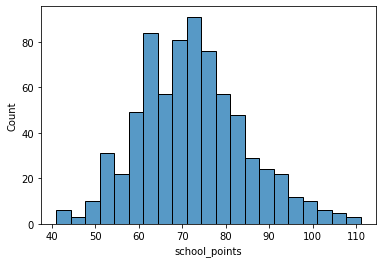

In [49]:
sns.histplot(df_nodups[df_nodups['sport'] == 'basketball']['school_points'])

<AxesSubplot:xlabel='school_points', ylabel='Count'>

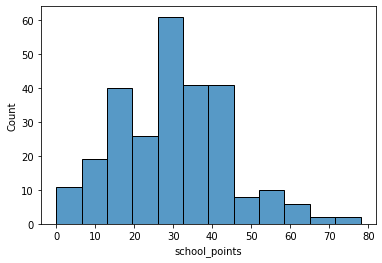

In [50]:
sns.histplot(df_nodups[df_nodups['sport'] == 'football']['school_points'])

In [51]:
print(df_nodups[df_nodups['sport'] == 'football']['school_points'].mean())
print(df_nodups[df_nodups['sport'] == 'football']['school_points'].std())

29.816479400749063
14.491118292364323


<AxesSubplot:xlabel='score_diff', ylabel='Count'>

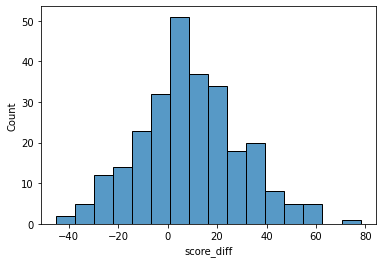

In [52]:
sns.histplot(df_nodups[df_nodups['sport'] == 'football']['score_diff'])

In [53]:
(df_nodups[df_nodups['sport'] == 'football']['score_diff']).describe()

count    267.000000
mean       9.318352
std       20.840059
min      -45.000000
25%       -3.000000
50%        7.000000
75%       23.000000
max       78.000000
Name: score_diff, dtype: float64

In [54]:
df_nodups[df_nodups['sport'] == 'football']['incident_count'].describe()

count    267.000000
mean       2.674157
std        2.362498
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       12.000000
Name: incident_count, dtype: float64

<AxesSubplot:xlabel='incident_count', ylabel='Count'>

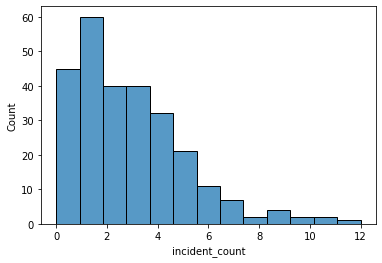

In [55]:
sns.histplot(df_nodups[df_nodups['sport'] == 'football']['incident_count'])